# Important formulas :

 ### - segmoid function ---> hθ(x) = (1 / 1 + (e^-(θT)*x)) 

 ### - cost function ---> J(θ) = 1/m m∑n=1 cost(hθ(x) - y)
 #### ---> cost(hθ(x) , y) = -log(hθ(x)) ----> y = 1
 #### ---> cost(hθ(x) , y) = -log(1 - hθ(x)) ----> y = 0
 #### Jθ(x) = - 1/m [m∑n=1 (y log(hθ(x))) + ((1 - y) log(1 - hθ(x)))]
 
 ### - gradient descent :
 #### ---> θj := θj - α m∑n=1 (hθ(x) - y)xj ---> formal equation
 #### ---> θ := θ - α 1/m XT(g(X*θ) - y) ---> same equation but edited to used in programming
 
 ### - regularization ---> Jθ = minθ 1/2m m∑n=1 (hθ(x) - y)^2 + λ n∑j=1 (θj)^2
 #### ---> θ0 := θ0 - α 1/m m∑i=1 (hθ(x) - y)x0
 #### ---> θj := θj - α [(1/m m∑i=1 (hθ(x) - y)xj)+ λ/m θj] 

## import libraries :

In [1]:
# use numpy to perform a mathematical operations on arrays.
import numpy as np
# use pandas to deal with dfset.
import pandas as pd
# use matplotlib to create static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

## read data

In [3]:
# specify the specific location of dfset.
path ='E:\\Mostafa\\Study Materials\Machin Learning Courses\\Hesham Asem Courses\\Practice\\Supervised Learning\\Classification\\Classification with one variable\\data.txt'
# read df from file in the specific location and add no headers.
# add names for columns Exam 1 for first column , Exam 2 for the second column and Admitted for the third column.
df = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

## show details of data

In [5]:
# print first 10 row of df.
print('data : \n' ,df.head(10) )
print('---------------------------------------')
# use describe method to see all important information about df like mean , std , min , etc.
print('describtion of data : \n',df.describe())
print('---------------------------------------')

data : 
       Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
---------------------------------------
describtion of data : 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
---------------------------------------


## separate output values in two variables

In [7]:
# assign output variable with value equal (1) to positive variable
positive = df[df['Admitted'].isin([1])]
# assign output variable with value equal (0) to negative variable
negative = df[df['Admitted'].isin([0])]

## draw distibution of posive and negative points accross Exam 1 and Exam 2

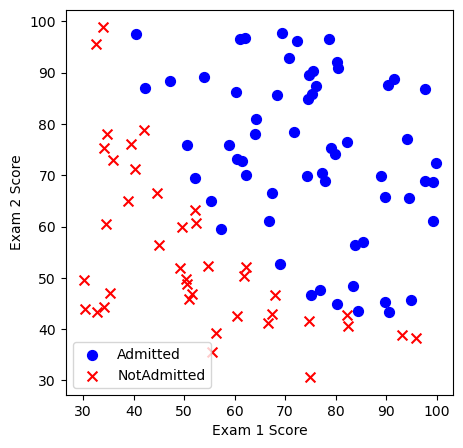

In [8]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw positive points accros Exam 1 and Exam 2
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o',label='Admitted')
# draw negative points accros Exam 1 and Exam 2
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='NotAdmitted')
# plot hint of all graphs types in the upper left side.
ax.legend()
# set name of x axis to be Exam 1 Score
ax.set_xlabel('Exam 1 Score')
# set name of y axis to be Exam 2 Score
ax.set_ylabel('Exam 2 Score')
# show graph with all distributions on screen
plt.show()

## sigmoid function

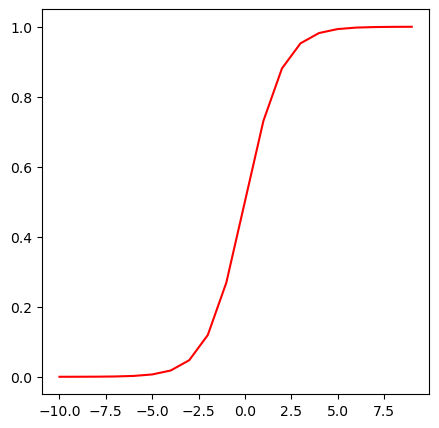

In [10]:
# use this formula to calculate the sigmoid function
# hθ(x) = 1 /1 + e^-θT*x
def sigmoid(z) :
    # this function takes parameter z from user which =(θT*x) and apply segmoid formula on it
    return 1 / (1 + np.exp(-z))
# simple example to represnt sigmoid function
# make array of 20 numbers from [-10 : 9]
nums = np.arange(-10, 10, step=1)
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# plot sigmoid function for nums
ax.plot(nums, sigmoid(nums), 'r')
# show graph on screen
plt.show()

In [ ]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [ ]:
# add a ones column - this makes the matrix multiplication work out easier
df.insert(0, 'Ones', 1)

In [ ]:
# set X (training df) and y (target variable)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [ ]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)
thiscost = cost(theta, X, y)
print()
print('cost = ' , thiscost)

In [ ]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()

In [ ]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [ ]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or 
                  (a == 0 and b == 0)) else 0 
            for (a, b) in zip(predictions, y)]

In [ ]:
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))